In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("../")

In [3]:
from data_processing.start_experiment import *
from data_processing.read_data import *
from data_processing.gaussian import *

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter
from emukit.core.initial_designs import RandomDesign
from emukit.core.initial_designs.latin_design import LatinDesign
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper
import GPy
from emukit.sensitivity.monte_carlo import MonteCarloSensitivity
import time

# Reading and Running Simulations

In [5]:
file_name = "basic_chemotax.par"
output_file = "data_cellcount_testing.txt"

mcs = 1000
season_experiment = 1
season_duration = 1000

create_config(file_name, {'mcs': mcs,
                          'season_experiment': season_experiment,
                          'season_duration': season_duration, 
                         'keylock_list_filename': '../data/keylock/KL_l24_14_16_g6.dat',
                         'evolsim': 1,
                        'mut_rate': 0.0})

In [6]:
execute_experiment(file_name,0)

Opening ../data/parameters/basic_chemotax.par for reading
[T  = 1.600000e+01]
[target_area  = 50]
[half_div_area  = 500]
[half_div_area_2  = -1]
[target_length  = 0]
[lambda  = 5.000000e+00]
[lambda2  = 0.000000e+00]
[keylock_list_filename  = ../data/keylock/KL_l24_14_16_g6.dat]
[conn_diss  = 0]
[vecadherinknockout  = false]
[extensiononly  = false]
[chemotaxis  = 0]
[border_energy  = 100]
[neighbours  = 2]
[min_area_for_life  = 4]
[key_lock_length  = 24]
[periodic_boundaries  = false]
[n_chem  = 0]
[n_init_cells  = 100]
[size_init_cells  = 25]
[sizex  = 500]
[sizey  = 500]
[divisions  = 0]
[mcs  = 1000]
[rseed  = -1]
[subfield  = 1.000000e+00]
[relaxation  = 0]
[storage_stride  = 1000]
[graphics  = false]
[store  = true]
[datadir  = data_film2]
[datafile  = data_cellcount.txt]
[save_text_file_period  = 1000]
[food_influx_location  = specified_experiment]
[initial_food_amount  = 0.000000e+00]
[foodinflux  = 5.000000e-02]
[eatprob  = 1.000000e+00]
[ardecay  = 0.000000e+00]
[growth  = 0.

In [7]:
all_cells = read_data("data_cellcount_testing.txt")

## Running simulations based on Latin Parameters

In [8]:
parameter_list = ['season_duration', 'gamma', 'mut_rate', 'T', 'target_area', 'gradnoise']

In [10]:
parameter_space = ParameterSpace([DiscreteParameter('season_duration',list(range(100,1001,10))), 
                                 DiscreteParameter('gamma',list(range(0,25))), 
                                 ContinuousParameter('mut_rate',0,0.5),
                                 ContinuousParameter('T',1,100),
                                 DiscreteParameter('target_area',list(range(1,101))),
                                 ContinuousParameter('gradnoise',0.25,0.99)])

In [11]:
mcs = 1000
num_experiments = 10

In [26]:
X = run_simulation_latin(parameter_space,num_experiments,0,{'mcs': mcs})

Opening ../data/parameters/latin_0.par for reading
Opening ../data/parameters/latin_1.par for reading
[T  = [T  = 7.525000e+01]
3.565000e+01]
[target_area  = [target_area  = 65]26]

[half_div_area  = [half_div_area  = 500]
500][half_div_area_2  = 
-1]
[half_div_area_2  = [target_length  = -1]0]

[lambda  = [target_length  = 0]
5.000000e+00]
[lambda  = [lambda2  = 5.000000e+00]
0.000000e+00][lambda2  = 
0.000000e+00]
[keylock_list_filename  = ../data/keylock/KL_same_11.dat]
[keylock_list_filename  = ../data/keylock/KL_same_13.dat]
[conn_diss  = 0]
[vecadherinknockout  = false][conn_diss  = 
0]
[extensiononly  = false][vecadherinknockout  = 
false]
[extensiononly  = false]
Opening ../data/parameters/latin_2.par for reading
[chemotaxis  = [chemotaxis  = 0]0]

[border_energy  = [border_energy  = 100]100]

[neighbours  = [neighbours  = 2]2]

[min_area_for_life  = [min_area_for_life  = 4]
4]
[T  = 5.545000e+01]
[target_area  = 16]
[half_div_area  = 500]
[half_div_area_2  = -1]
[target_length

[sizey  = 500]
[divisions  = 0]
[persduration  = 50]
[mcs  = 1000]
[rseed  = -1]
[subfield  = 1.000000e+00]
[relaxation  = 0]
[storage_stride  = 1000]
[graphics  = false]
[store  = true]
[datadir  = data_film2]
[datafile  = data_cellcount.txt]
[startmu  = 3.000000e+00]
[init_chemmu  = 1.000000e+00]
[Jmed_rule_input  = 8o4_3_2_1_1_1]
Randomizing random generator, seed is Random seed is 300970
Using X11 graphics (batch mode). sizex and y are 500 500
[scaling_cell_to_ca_time  = 10]
[backupdir  = backup]
[save_text_file_period  = 1000]
[save_backup_period  = 100000]
Placed 100 cells out of 100 requested; avrg area = 25
[food_influx_location  = specified_experiment]
[initial_food_amount  = Reading Key Lock list file0.000000e+00]

[foodinflux  = 5.000000e-02]
[eatprob  = 1.000000e+00]
[ardecay  = 0.000000e+00]
nr cells placed 100
[ cells = 100]
[init_maintenance_fraction  = 1.000000e+00]
[init_k_mf_0  = 1.000000e+00]
[init_k_mf_A  = 0.000000e+00]
[init_k_mf_P  = 0.000000e+00]
[init_k_mf_C  =

[gradnoise  = 9.530000e-01]
[gradscale  = 1.000000e+00]
[min_contact_duration_for_preying  = 2.500000e+01]
[frac_contlen_eaten  = 1.000000e+00]
[metabolic_conversion  = 5.000000e-01]
[chancemediumcopied  = 1.000000e-04]
[readcolortable  = false]
[colortable_filename  = ../data/circular.ctb]
[howmany_makeit_for_nextgen  = 50]
[popsize  = 100]
[the_line  = 50]
[is_there_food  = false]
[init_maintenance_fraction  = 1.000000e+00]
[init_k_mf_0  = 1.000000e+00]
[init_k_mf_A  = 0.000000e+00]
[init_k_mf_P  = 0.000000e+00]
[init_k_mf_C  = 0.000000e+00]
[init_k_ext_0  = 1.000000e+00]
[init_k_ext_A  = 0.000000e+00]
[init_k_ext_P  = 0.000000e+00]
[init_k_ext_C  = 0.000000e+00]
[init_weight_for_chemotaxis  = 1.000000e+00]
[init_k_chem_0  = 1.000000e+00]
[init_k_chem_A  = 0.000000e+00]
[init_k_chem_P  = 0.000000e+00]
[init_k_chem_C  = 0.000000e+00]
[evolreg  = false]
[howmany_makeit_for_nextgen  = 50]
[popsize  = 100]
[the_line  = 50]
[is_there_food  = false]
[zero_persistence_past_theline  = false]

# Using Emukit with Simulations

## Create Emukit Model

In [27]:
def average_blob_size(all_cells):
    all_times = sorted(list(set([i.time for i in all_cells])))
    weighted_size_over_time = [weighted_blobsize_cells(all_cells,i) for i in all_times]
        
    average_weighted_size = np.mean(weighted_size_over_time)
    return average_weighted_size

In [31]:
file_names = ["latin_{}.par".format(i) for i in range(num_experiments)]

In [32]:
X = get_parameter_array(file_names,parameter_list)
Y = get_rewards(["data_cellcount_{}.txt".format(i) for i in range(10)],average_blob_size)

In [ ]:
season_duratio

In [33]:
emukit_model = get_emukit_model(X,Y,lengthscale=100,variance=1000,noise_var=1e-1)

 /home/nraman1/.local/lib/python3.8/site-packages/GPy/core/gp.py:85: UserWarning:Your kernel has a different input dimension 1 then the given X dimension 6. Be very sure this is what you want and you have not forgotten to set the right input dimenion in your kernel


## Plot Gaussian Process Model

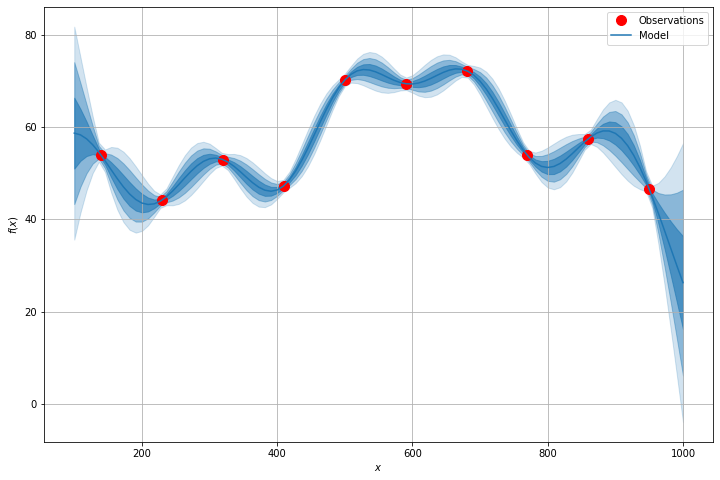

In [27]:
plot_gaussian_process(np.linspace(100,1000,100),emukit_model)

## Perform Sensitivity Analysis

In [28]:
get_sobol_indices(emukit_model,parameter_space)

({'season_duration': array([1.00324193])},
 {'season_duration': array([0.82415686])})